---
title: "Exploratory Data Analysis of CO2 Emmisions Data with Python"
author: "Puneet Thukral"
date: 2024-11-18T07:00:00 
draft: false
slug: "co2_emmisions_eda"
---
[EDGAR CO2 emmisions data](https://edgar.jrc.ec.europa.eu/report_2024)

## ToDo:
+ [ ] Remove Global Total Row From the Top 20 and 5 Datasets
+ [x] % Increase in Avaiation and Shipping
+ [x] Extract Figures for Aviation and Shipping
+ [ ] % of Total Emissions by the Top 20 - 1970
+ [ ] % of Total Emissions by the Top 5 - 1970
+ [ ] % of Total Emissions by the Top 20 - 2023
+ [ ] % of Total Emissions by the Top 5 - 2023
+ [ ] Total CO2 Emissions for Each Year
+ [x] Grand Total Emissions of Co2
+ [ ] Create a ToC
+ [ ] Create A Visual/Dashboard



***

An EDA of CO2 emmisons based on EDGAR(Emissions Database for Global Atmospheric Research) data.

In [229]:
# Import
# To read Excel files install openpyxl, 'pip install openpyxl'.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = 'data/EDGAR_2024_GHG_booklet_2024_fossilCO2only.xlsx' 
excel_file = pd.ExcelFile(file_path)

In [230]:
# Get the sheet names
sheet_names = excel_file.sheet_names
print(sheet_names)

['info', 'citations and references', 'fossil_CO2_totals_by_country', 'fossil_CO2_by_sector_country_su', 'fossil_CO2_per_GDP_by_country', 'fossil_CO2_per_capita_by_countr']


In [231]:

# Load a specific 'fossil_CO2_totals_by_country' sheet into a DataFrame
# You can load the other sheets here for additional Analysis
data = pd.read_excel(file_path, sheet_name='fossil_CO2_totals_by_country')

# Inspect the Data  
print(data.head())
print(data.info())
print(data.describe())

  Substance EDGAR Country Code                 Country        1970  \
0       CO2                ABW                   Aruba    0.025214   
1       CO2                AFG             Afghanistan    1.733920   
2       CO2                AGO                  Angola    8.933899   
3       CO2                AIA                Anguilla    0.002178   
4       CO2                AIR  International Aviation  169.900399   

         1971        1972        1973        1974        1975        1976  \
0    0.028828    0.039472    0.044289    0.043469    0.057396    0.056423   
1    1.733710    1.693584    1.733905    2.190318    2.028967    1.892642   
2    8.519513   10.366104   11.346996   11.806561   10.904653    7.291981   
3    0.002178    0.002273    0.002118    0.002360    0.002594    0.002444   
4  169.900399  179.759531  187.494406  180.478129  174.582471  174.907983   

   ...        2014        2015        2016        2017        2018  \
0  ...    0.440689    0.462026    0.484889    

In [232]:
# Check for missing values
print(data.isnull().sum())

Substance             2
EDGAR Country Code    2
Country               2
1970                  2
1971                  2
1972                  2
1973                  2
1974                  2
1975                  2
1976                  2
1977                  2
1978                  2
1979                  2
1980                  2
1981                  2
1982                  2
1983                  2
1984                  2
1985                  2
1986                  2
1987                  2
1988                  2
1989                  2
1990                  2
1991                  2
1992                  2
1993                  2
1994                  2
1995                  2
1996                  2
1997                  2
1998                  2
1999                  2
2000                  2
2001                  2
2002                  2
2003                  2
2004                  2
2005                  2
2006                  2
2007                  2
2008            

In [233]:
# Check for rows where all columns are missing
# As we can see from above we have 2 missing values for each coloumn which could be that we have two rows with no data
missing_rows = data[data.isnull().all(axis=1)]
print(missing_rows)

    Substance EDGAR Country Code Country  1970  1971  1972  1973  1974  1975  \
210       NaN                NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN   
212       NaN                NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN   

     1976  ...  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023  
210   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
212   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[2 rows x 57 columns]


In [234]:
# Let's drop thos emissing rows
# Drop rows where all columns are missing
data_cleaned = data.dropna(how='all')

# Display the first few rows of the cleaned dataset
print(data_cleaned.head())

# Check if the rows were successfully dropped
print(data_cleaned.isnull().sum())

  Substance EDGAR Country Code                 Country        1970  \
0       CO2                ABW                   Aruba    0.025214   
1       CO2                AFG             Afghanistan    1.733920   
2       CO2                AGO                  Angola    8.933899   
3       CO2                AIA                Anguilla    0.002178   
4       CO2                AIR  International Aviation  169.900399   

         1971        1972        1973        1974        1975        1976  \
0    0.028828    0.039472    0.044289    0.043469    0.057396    0.056423   
1    1.733710    1.693584    1.733905    2.190318    2.028967    1.892642   
2    8.519513   10.366104   11.346996   11.806561   10.904653    7.291981   
3    0.002178    0.002273    0.002118    0.002360    0.002594    0.002444   
4  169.900399  179.759531  187.494406  180.478129  174.582471  174.907983   

   ...        2014        2015        2016        2017        2018  \
0  ...    0.440689    0.462026    0.484889    

In [235]:
# Display the data types of all columns
print(data.dtypes)

Substance              object
EDGAR Country Code     object
Country                object
1970                  float64
1971                  float64
1972                  float64
1973                  float64
1974                  float64
1975                  float64
1976                  float64
1977                  float64
1978                  float64
1979                  float64
1980                  float64
1981                  float64
1982                  float64
1983                  float64
1984                  float64
1985                  float64
1986                  float64
1987                  float64
1988                  float64
1989                  float64
1990                  float64
1991                  float64
1992                  float64
1993                  float64
1994                  float64
1995                  float64
1996                  float64
1997                  float64
1998                  float64
1999                  float64
2000      

In [236]:
# Display the cleaned column names
print(data_cleaned.columns)


Index([         'Substance', 'EDGAR Country Code',            'Country',
                       1970,                 1971,                 1972,
                       1973,                 1974,                 1975,
                       1976,                 1977,                 1978,
                       1979,                 1980,                 1981,
                       1982,                 1983,                 1984,
                       1985,                 1986,                 1987,
                       1988,                 1989,                 1990,
                       1991,                 1992,                 1993,
                       1994,                 1995,                 1996,
                       1997,                 1998,                 1999,
                       2000,                 2001,                 2002,
                       2003,                 2004,                 2005,
                       2006,                 2007, 

In [237]:
# Convert all columns to string types 
data_cleaned = data_cleaned.astype(str)

# Clean column names
#data.columns = data.columns.str.strip()  # Remove leading and trailing spaces
#data.columns = data.columns.str.replace('\n', ' ')  # Replace newline characters with spaces

# Display the cleaned column names
print(data.columns)

# Display the data types of all columns
print(data_cleaned.dtypes)

Index([         'Substance', 'EDGAR Country Code',            'Country',
                       1970,                 1971,                 1972,
                       1973,                 1974,                 1975,
                       1976,                 1977,                 1978,
                       1979,                 1980,                 1981,
                       1982,                 1983,                 1984,
                       1985,                 1986,                 1987,
                       1988,                 1989,                 1990,
                       1991,                 1992,                 1993,
                       1994,                 1995,                 1996,
                       1997,                 1998,                 1999,
                       2000,                 2001,                 2002,
                       2003,                 2004,                 2005,
                       2006,                 2007, 

In [238]:
year_columns = data_cleaned.filter(regex=r'^\d{4}$').columns
print(year_columns)

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023],
      dtype='object')


In [239]:
# Convert Index to list
year_columns_list = year_columns.tolist()

print(year_columns_list)

# Access the column by its name
print(year_columns_list[year_columns_list.index(1970)])


[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
1970


In [240]:
# Drop rows where all columns are missing
data_cleaned = data.dropna(how='all')

Calculate Total CO2 Emissions and Percentage Contribution

In [241]:
# Convert all columns to string types
# This is because 
#data = data.astype(str)

# Use regex to filter columns that contain the year (assuming years are four-digit numbers)
year_columns = data.filter(regex=r'^\d{4}$').columns

# Convert year columns to numeric
data[year_columns] = data[year_columns].apply(pd.to_numeric, errors='coerce')

# Calculate total CO2 emissions for each country
data['Total_CO2'] = data[year_columns].sum(axis=1)

# Identify the top 20 most polluting countries
top_20_countries = data.nlargest(20, 'Total_CO2')

# Calculate percentage contribution for each year
for year in year_columns:
    total_emissions_year = data[year].sum()
    top_20_countries[f'{year}_Percentage'] = (top_20_countries[year] / total_emissions_year) * 100

# Display the top 20 countries with their total CO2 emissions and percentage contribution
#print(top_20_countries[['Country', 'Total_CO2'] + [f'{year}_Percentage' for year in year_columns]])
print(top_20_countries[['Country', 'Total_CO2']])


                                Country     Total_CO2
213                        GLOBAL TOTAL  1.424122e+06
36                                China  2.779245e+05
198                       United States  2.761683e+05
211                                EU27  1.925624e+05
160                              Russia  9.865735e+04
99                                Japan  6.067946e+04
90                                India  5.948510e+04
50                              Germany  5.013919e+04
69                       United Kingdom  2.899794e+04
33                               Canada  2.683242e+04
165              International Shipping  2.600512e+04
196                             Ukraine  2.460650e+04
66                    France and Monaco  2.174306e+04
96   Italy, San Marino and the Holy See  2.143453e+04
106                         South Korea  2.040593e+04
151                              Poland  1.938792e+04
92                                 Iran  1.933123e+04
123                         

In [242]:
# Return the Global Total for 1970 and 2023

# Extract the row for Global Total
global_total_row = data_cleaned[data_cleaned['Country'] == 'GLOBAL TOTAL']
print(global_total_row)

# Return the Global Total for 1970
global_total_1970 = global_total_row[1970].values[0]
# Return the Global Total for 2023
global_total_2023 = global_total_row[2023].values[0]
print(f"Global Total Co2 Emmisions - 1970: {global_total_1970}")
print(f"Global Total Co2 Emmisions - 2023: {global_total_2023}")

# Calculate the grand total of all years combined
grand_total = global_total_row[year_columns].sum(axis=1).values[0]
print(f"Grand Total of Emissions 1970 -2023: {grand_total}")  

    Substance EDGAR Country Code       Country          1970          1971  \
213       CO2       GLOBAL TOTAL  GLOBAL TOTAL  15751.858044  15683.389817   

             1972          1973          1974          1975          1976  \
213  16481.436077  17464.383654  17400.275859  17328.558005  18317.005105   

     ...          2014          2015          2016          2017  \
213  ...  36427.769713  36300.466451  36423.660699  37047.472031   

             2018          2019          2020          2021          2022  \
213  37974.553886  38066.434146  36154.308044  38121.014981  38246.624061   

             2023  
213  39023.937039  

[1 rows x 57 columns]
Global Total Co2 Emmisions - 1970: 15751.858044223
Global Total Co2 Emmisions - 2023: 39023.937038738
Grand Total of Emissions 1970 -2023: 1424121.724861018


In [243]:
# Extract Figures for Aviation - 'International Aviation'

# Extarct Aviation Row
avaiation_row = data_cleaned[data_cleaned['Country'] == 'International Aviation']
print(avaiation_row)

# Return the Aviation Total for 1970
avaiation_total_1970 = avaiation_row[1970].values[0]

# Return the Global Total for 2023
avaiation_total_2023 = avaiation_row[2023].values[0]
print(f"International Aviation Total Co2 Emmisions - 1970: {global_total_1970}")
print(f"International Aviation Total Co2 Emmisions - 2023: {global_total_2023}")

# Total Emissions for International Aviation - 1970 -2023
aviation_grand_total = avaiation_row[year_columns].sum(axis=1).values[0]
print(f"Total Emissions for International Aviation - 1970 -2023: {aviation_grand_total}") 




  Substance EDGAR Country Code                 Country        1970  \
4       CO2                AIR  International Aviation  169.900399   

         1971        1972        1973        1974        1975        1976  \
4  169.900399  179.759531  187.494406  180.478129  174.582471  174.907983   

   ...        2014       2015        2016        2017        2018        2019  \
4  ...  507.505761  536.21368  560.173839  589.919315  615.937542  625.141435   

         2020        2021        2022        2023  
4  298.655678  331.317425  411.474866  491.632308  

[1 rows x 57 columns]
International Aviation Total Co2 Emmisions - 1970: 15751.858044223
International Aviation Total Co2 Emmisions - 2023: 39023.937038738
Total Emissions for International Aviation - 1970 -2023: 18071.560975227614


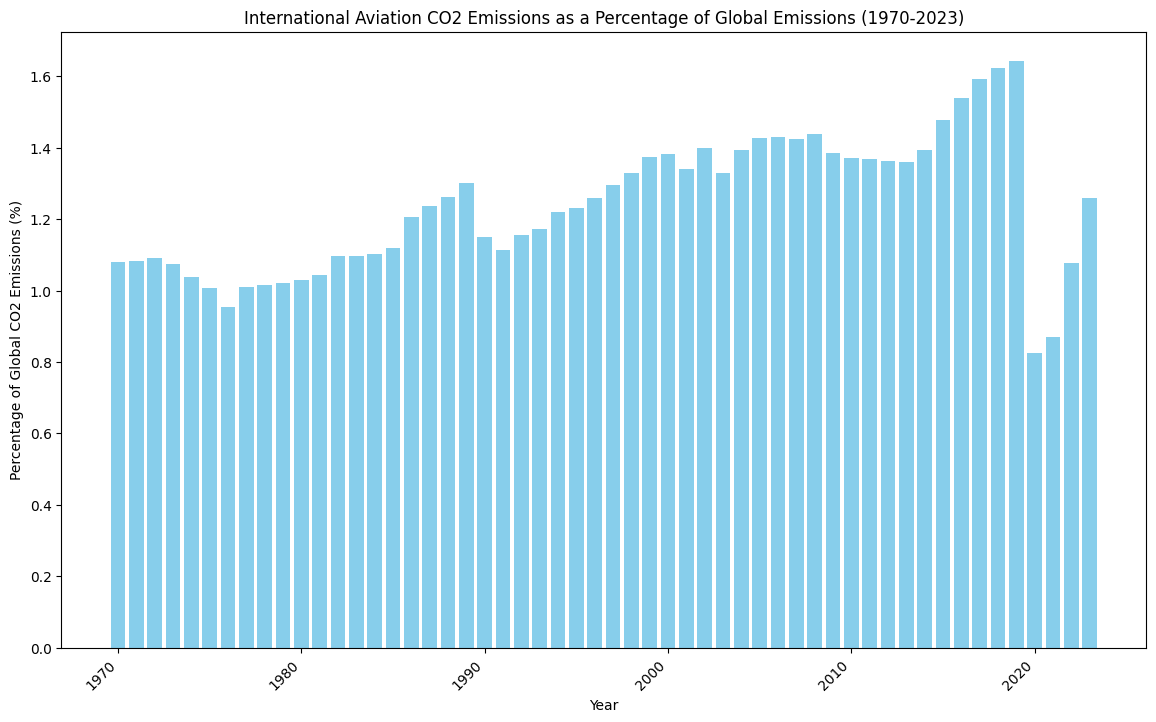

In [244]:
# International Aviation as a % Global Total 


# Calculate the percentage of global emissions for each year
aviation_percentage_emissions = {}  # Initialize an empty dictionary to store the percentage emissions for each year

for year in year_columns:  # Loop through each year in the year_columns
    global_total = global_total_row[year].values[0]  # Get the global total CO2 emissions for the current year
    shipping_total = avaiation_row[year].values[0]  # Get the CO2 emissions for International Shipping for the current year
    aviation_percentage_emissions[year] = (shipping_total / global_total) * 100  # Calculate the percentage of global emissions and store it in the dictionary


# Convert the dictionary to a DataFrame for plotting
aviation_percentage_emissions_df = pd.DataFrame(list(aviation_percentage_emissions.items()), columns=['Year', 'Percentage'])
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(14, 8))
plt.bar(aviation_percentage_emissions_df['Year'], aviation_percentage_emissions_df['Percentage'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Percentage of Global CO2 Emissions (%)')
plt.title('International Aviation CO2 Emissions as a Percentage of Global Emissions (1970-2023)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [245]:
# Extract Figures for = Shipping - 'International Shipping'

# Extarct Shipping Row
shipping_row = data_cleaned[data_cleaned['Country'] == 'International Shipping']
print(avaiation_row)

# Return the Aviation Total for 1970
shipping_total_1970 = shipping_row[1970].values[0]
print(f"International Shipping Total Co2 Emmisions - 1970: {shipping_total_1970}")

# Return the Global Total for 2023
shipping_total_2023 = shipping_row[2023].values[0]
print(f"International Shipping Total Co2 Emmisions - 2023: {shipping_total_2023}")

# Total Emissions for International Shipping - 1970 -2023
shipping_grand_total = shipping_row[year_columns].sum(axis=1).values[0]
print(f"Total Emissions for International Shipping - 1970 -2023: {shipping_grand_total}") 


  Substance EDGAR Country Code                 Country        1970  \
4       CO2                AIR  International Aviation  169.900399   

         1971        1972        1973        1974        1975        1976  \
4  169.900399  179.759531  187.494406  180.478129  174.582471  174.907983   

   ...        2014       2015        2016        2017        2018        2019  \
4  ...  507.505761  536.21368  560.173839  589.919315  615.937542  625.141435   

         2020        2021        2022        2023  
4  298.655678  331.317425  411.474866  491.632308  

[1 rows x 57 columns]
International Shipping Total Co2 Emmisions - 1970: 353.84635222099
International Shipping Total Co2 Emmisions - 2023: 706.32042124359
Total Emissions for International Shipping - 1970 -2023: 26005.11654870811


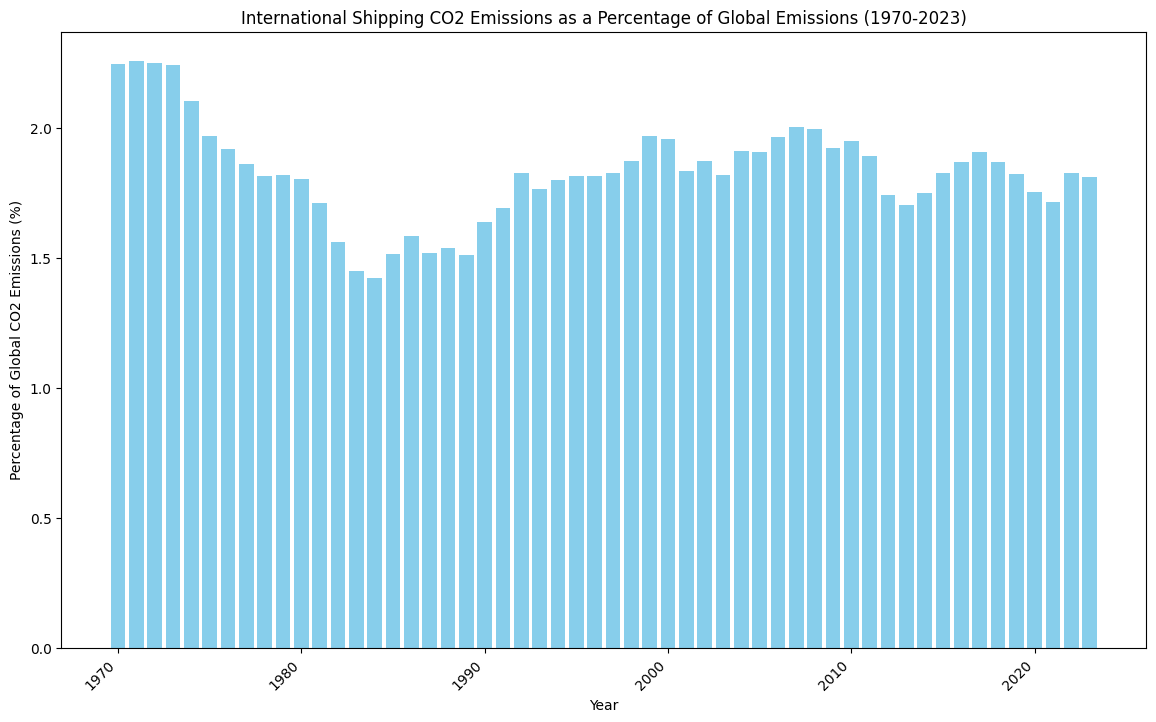

In [246]:
# International Shipping as a % Global Total 


# Calculate the percentage of global emissions for each year
percentage_emissions = {}  # Initialize an empty dictionary to store the percentage emissions for each year

for year in year_columns:  # Loop through each year in the year_columns
    global_total = global_total_row[year].values[0]  # Get the global total CO2 emissions for the current year
    shipping_total = shipping_row[year].values[0]  # Get the CO2 emissions for International Shipping for the current year
    percentage_emissions[year] = (shipping_total / global_total) * 100  # Calculate the percentage of global emissions and store it in the dictionary


# Convert the dictionary to a DataFrame for plotting
percentage_emissions_df = pd.DataFrame(list(percentage_emissions.items()), columns=['Year', 'Percentage'])
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(14, 8))
plt.bar(percentage_emissions_df['Year'], percentage_emissions_df['Percentage'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Percentage of Global CO2 Emissions (%)')
plt.title('International Shipping CO2 Emissions as a Percentage of Global Emissions (1970-2023)')
plt.xticks(rotation=45, ha='right')
plt.show()



In [247]:
################################# REMOVE GLOBAL TOTAL FROM TOP 20 and TOP 5 ##################################

# % of Total Emissions by the Top 20 - 1970

In [248]:
# Calculate total CO2 emissions for each country in 1970
data['Total_1970'] = data[1970].astype(float)

# Identify the top 20 most polluting countries in 1970
top_20_1970 = data.nlargest(20, 'Total_1970')

# Calculate the percentage of total emissions by the top 20 countries in 1970
total_emissions_1970 = data[1970].astype(float).sum()
top_20_percentage_1970 = (top_20_1970['Total_1970'].sum() / total_emissions_1970) * 100

print(f"% of Total Emissions by the Top 20 - 1970: {top_20_percentage_1970:.2f}%")


% of Total Emissions by the Top 20 - 1970: 91.59%


# % of Total Emissions by the Top 5 - 1970

In [249]:
# Identify the top 5 most polluting countries in 1970
top_5_1970 = data.nlargest(5, 'Total_1970')

# Calculate the percentage of total emissions by the top 5 countries in 1970
top_5_percentage_1970 = (top_5_1970['Total_1970'].sum() / total_emissions_1970) * 100

print(f"% of Total Emissions by the Top 5 - 1970: {top_5_percentage_1970:.2f}%")


% of Total Emissions by the Top 5 - 1970: 74.97%


# % of Total Emissions by the Top 20 - 2023

In [250]:
# Calculate total CO2 emissions for each country in 2023
data['Total_2023'] = data[2023].astype(float)

# Identify the top 20 most polluting countries in 2023
top_20_2023 = data.nlargest(20, 'Total_2023')

# Calculate the percentage of total emissions by the top 20 countries in 2023
total_emissions_2023 = data[2023].astype(float).sum()
top_20_percentage_2023 = (top_20_2023['Total_2023'].sum() / total_emissions_2023) * 100

print(f"% of Total Emissions by the Top 20 - 2023: {top_20_percentage_2023:.2f}%")


% of Total Emissions by the Top 20 - 2023: 90.15%


# % of Total Emissions by the Top 5 - 2023

In [251]:
# Identify the top 5 most polluting countries in 2023
top_5_2023 = data.nlargest(5, 'Total_2023')

# Calculate the percentage of total emissions by the top 5 countries in 2023
top_5_percentage_2023 = (top_5_2023['Total_2023'].sum() / total_emissions_2023) * 100

print(f"% of Total Emissions by the Top 5 - 2023: {top_5_percentage_2023:.2f}%")
print(top_5_2023)


% of Total Emissions by the Top 5 - 2023: 77.50%
    Substance EDGAR Country Code        Country          1970          1971  \
213       CO2       GLOBAL TOTAL   GLOBAL TOTAL  15751.858044  15683.389817   
36        CO2                CHN          China    909.976242    913.419357   
198       CO2                USA  United States   4595.062878   4459.919046   
90        CO2                IND          India    213.934448    214.428120   
211       CO2               EU27           EU27   3516.043820   3527.064466   

             1972          1973          1974          1975          1976  \
213  16481.436077  17464.383654  17400.275859  17328.558005  18317.005105   
36     973.909875   1013.661370   1031.209355   1182.598584   1230.625731   
198   4710.777160   4896.845457   4727.681218   4515.615986   4816.015256   
90     222.963236    221.937314    237.640939    253.201702    270.693578   
211   3673.209130   3865.983444   3806.132347   3715.356555   3975.200616   

     ...     